# Self-Driving Car Engineer Nanodegree

## Deep Learning

## Project: Build a Traffic Sign Recognition Classifier

In this notebook, a template is provided for you to implement your functionality in stages, which is required to successfully complete this project. If additional code is required that cannot be included in the notebook, be sure that the Python code is successfully imported and included in your submission if necessary. 

> **Note**: Once you have completed all of the code implementations, you need to finalize your work by exporting the iPython Notebook as an HTML document. Before exporting the notebook to html, all of the code cells need to have been run so that reviewers can see the final implementation and output. You can then export the notebook by using the menu above and navigating to  \n",
    "**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission. 

In addition to implementing code, there is a writeup to complete. The writeup should be completed in a separate file, which can be either a markdown file or a pdf document. There is a [write up template](https://github.com/udacity/CarND-Traffic-Sign-Classifier-Project/blob/master/writeup_template.md) that can be used to guide the writing process. Completing the code template and writeup template will cover all of the [rubric points](https://review.udacity.com/#!/rubrics/481/view) for this project.

The [rubric](https://review.udacity.com/#!/rubrics/481/view) contains "Stand Out Suggestions" for enhancing the project beyond the minimum requirements. The stand out suggestions are optional. If you decide to pursue the "stand out suggestions", you can include the code in this Ipython notebook and also discuss the results in the writeup file.


>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut. In addition, Markdown cells can be edited by typically double-clicking the cell to enter edit mode.

## [Cell 0] Timer Class for Benchmarking

Taken from: http://howto.lintel.in/how-to-measure-the-duration-of-a-function-call-or-code-block-in-python/

In [1]:
import time

class StopWatch:
    def __init__(self):
        self.start = None
        self.end = None

    def __enter__(self):
        self.start = time.time()
        return self

    def __exit__(self, exc_type, exc_val, exc_tb):
        self.end = time.time()
        print("Total time taken: {:.2f} seconds".format((self.end - self.start)))

    def duration(self):
        return str((self.end - self.start)) + ' seconds'

---
## [Cell 1] Step 0: Load The Data

In [2]:
# Load pickled data
import pickle
from sklearn.model_selection import train_test_split

# TODO: Fill this in based on where you saved the training and testing data

training_file = 'traffic-signs-data/train.p'
testing_file = 'traffic-signs-data/test.p'
validation_file = 'traffic-signs-data/valid.p'

with open(training_file, mode='rb') as f:
    train = pickle.load(f)
with open(testing_file, mode='rb') as f:
    test = pickle.load(f)
with open(validation_file, mode='rb') as f:
    validation = pickle.load(f)
    
    
# We have a copy of the images because we shuffle both the images and y values during training
clr_X_train, clr_y_train = train['features'], train['labels']
clr_X_test, clr_y_test = test['features'], test['labels']
clr_X_validation, clr_y_validation = validation['features'], validation['labels']


# X_train, X_validation, y_train, y_validation = train_test_split(X_train, y_train, test_size=0.2, random_state=0)

print("Updated image shape: ", format(clr_X_train[0].shape))

print("X_train: ", clr_X_train.shape, ", X_validation: ", clr_X_validation.shape, ", X_test: ", clr_X_test.shape)
print("y_train: ", clr_y_train.shape, ", y_validation: ", clr_y_validation.shape, ", y_test: ", clr_y_test.shape)

Updated image shape:  (32, 32, 3)
X_train:  (34799, 32, 32, 3) , X_validation:  (4410, 32, 32, 3) , X_test:  (12630, 32, 32, 3)
y_train:  (34799,) , y_validation:  (4410,) , y_test:  (12630,)


---

## [Cell 2] Step 1: Dataset Summary & Exploration

The pickled data is a dictionary with 4 key/value pairs:

- `'features'` is a 4D array containing raw pixel data of the traffic sign images, (num examples, width, height, channels).
- `'labels'` is a 1D array containing the label/class id of the traffic sign. The file `signnames.csv` contains id -> name mappings for each id.
- `'sizes'` is a list containing tuples, (width, height) representing the the original width and height the image.
- `'coords'` is a list containing tuples, (x1, y1, x2, y2) representing coordinates of a bounding box around the sign in the image. **THESE COORDINATES ASSUME THE ORIGINAL IMAGE. THE PICKLED DATA CONTAINS RESIZED VERSIONS (32 by 32) OF THESE IMAGES**

Complete the basic data summary below. Use python, numpy and/or pandas methods to calculate the data summary rather than hard coding the results. For example, the [pandas shape method](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.shape.html) might be useful for calculating some of the summary results. 

### [Cell 3] Provide a Basic Summary of the Data Set Using Python, Numpy and/or Pandas

In [3]:
import numpy as np
import csv

### Replace each question mark with the appropriate value. 
### Use python, pandas or numpy methods rather than hard coding the results

# TODO: Number of training examples
n_train = clr_X_train.shape[0]

n_validation = clr_X_validation.shape[0]

# TODO: Number of testing examples.
n_test = clr_X_test.shape[0]

# TODO: What's the shape of an traffic sign image?
image_shape = clr_X_train[0].shape

# TODO: How many unique classes/labels there are in the dataset.
n_classes = np.unique(clr_y_train).size

print("Number of training examples =", n_train)
print("Number of validation examples =", n_validation)
print("Number of testing examples =", n_test)
print("Image data shape (before preprocessing) =", image_shape)
print("Number of classes =", n_classes)

y_names = {}
with open("signnames.csv", "r") as sgn_file:
    sign_reader = csv.DictReader(sgn_file)
    for row in sign_reader:
        y_names[int(row['ClassId'])] = row['SignName']
print()
print("Signs: ", y_names)

def get_name(index):
    return "[" + str(index) + "-" + y_names[index] + "]"

Number of training examples = 34799
Number of validation examples = 4410
Number of testing examples = 12630
Image data shape (before preprocessing) = (32, 32, 3)
Number of classes = 43

Signs:  {0: 'Speed limit (20km/h)', 1: 'Speed limit (30km/h)', 2: 'Speed limit (50km/h)', 3: 'Speed limit (60km/h)', 4: 'Speed limit (70km/h)', 5: 'Speed limit (80km/h)', 6: 'End of speed limit (80km/h)', 7: 'Speed limit (100km/h)', 8: 'Speed limit (120km/h)', 9: 'No passing', 10: 'No passing for vehicles over 3.5 metric tons', 11: 'Right-of-way at the next intersection', 12: 'Priority road', 13: 'Yield', 14: 'Stop', 15: 'No vehicles', 16: 'Vehicles over 3.5 metric tons prohibited', 17: 'No entry', 18: 'General caution', 19: 'Dangerous curve to the left', 20: 'Dangerous curve to the right', 21: 'Double curve', 22: 'Bumpy road', 23: 'Slippery road', 24: 'Road narrows on the right', 25: 'Road work', 26: 'Traffic signals', 27: 'Pedestrians', 28: 'Children crossing', 29: 'Bicycles crossing', 30: 'Beware of 

## [Cell 4] Augmenting Training Data
The below section applies a bunch of transformations randomly to a copy of the training and validation data with hopes of building a more robust network using the same training data.

In [ ]:
from functools import partial
import numpy as np
import tensorflow as tf

import random
import cv2
import matplotlib.pyplot as plt
%matplotlib inline

def plot_image(images, title=""):
    plt.figure(figsize=(len(images)*2, 2))
    plt.title(title)
    if(len(images[0].shape) > 2 and images[0].shape[2] > 1):
        plt.imshow(np.hstack(images))
    else:
        plt.imshow(np.hstack([i.squeeze() for i in images]), cmap='gray')
    plt.show()

def random_sample(x_source, y_source, sample_percentage):
    x_samples = []
    y_samples = []
    for i in range(0, len(x_source)):
        if np.random.uniform() < sample_percentage:
            x_samples.append(x_source[i])
            y_samples.append(y_source[i])
    
    return x_samples, y_samples

distortion_pool = [
    partial(tf.image.random_brightness, max_delta=50),
    partial(tf.image.random_flip_up_down),
    partial(tf.image.random_flip_left_right),
    partial(tf.image.random_hue, max_delta=0.10),
    partial(tf.image.random_contrast, lower=0, upper=10),
    partial(tf.image.random_saturation, lower=0, upper=10)
]

def distortion_pipeline(tf_image):
    distort_index = int(np.random.uniform()*len(distortion_pool))
    tf_image = distortion_pool[distort_index](image = tf_image)
    return tf_image, distortion_pool[distort_index]

def sample_and_distort(X_val, y_val, sample_percent, tf_x_aug):
    x_augmented = []
    y_augmented = []
    distortions = []
    count = 0
    x_samples, y_samples = random_sample(X_val, y_val, sample_percent)
    for x_sample, y_sample in zip(x_samples, y_samples):
        d_image, distortion = distortion_pipeline(tf_x_aug)
        # TODO: Pass these as batches instead of individual images to speeden things up
        x_aug_img = sess.run(d_image, {tf_x_aug: x_sample})
        x_augmented.append(x_aug_img.astype('uint8'))
        y_augmented.append(y_sample)
        distortions.append(distortion)
        count += 1
        if count%100 == 0:
            print(count, "/", len(x_samples), "done")
    return np.array(x_augmented), np.array(y_augmented), np.array(x_samples), np.array(y_samples), distortions


def generate_augmented_data():
    tf.reset_default_graph()

    x_aug = tf.placeholder(tf.float32, image_shape)

    with tf.Session() as sess:
        sess.run(tf.global_variables_initializer())

        with StopWatch() as sw:
            clr_X_aug_train, clr_y_aug_train, clr_sampled_X_train, clr_sampled_y_train, train_distortions = sample_and_distort(clr_X_train, clr_y_train, 0.05, x_aug)
            print("Generated", clr_X_aug_train.shape, "augmented images from training set for training")

        with StopWatch() as sw:
            clr_X_aug_validation, clr_y_aug_validation, clr_sampled_X_validation, clr_sampled_y_validation, validation_distortions = sample_and_distort(clr_X_validation, clr_y_validation, 0.1, x_aug)
            print("Generated", clr_X_aug_validation.shape, "augmented images from validation set for validation")

        with StopWatch() as sw:
            clr_X_aug_validation2, clr_y_aug_validation2, clr_sampled_X_validation2, clr_sampled_y_validation2, validation_distortions2 = sample_and_distort(clr_X_train, clr_y_train, 0.05, x_aug)
            print("Generated", clr_X_aug_validation2.shape, "augmented images from training set for validation")

    clr_X_aug_validation = np.append(clr_X_aug_validation, clr_X_aug_validation2, axis=0)
    clr_y_aug_validation = np.append(clr_y_aug_validation, clr_y_aug_validation2)
    clr_sampled_X_validation = np.append(clr_sampled_X_validation, clr_sampled_X_validation2, axis=0)
    clr_sampled_y_validation = np.append(clr_sampled_y_validation, clr_sampled_y_validation2)

    np.save("./aug/train-x", clr_X_aug_train)
    np.save("./aug/train-y.npy", clr_y_aug_train)
    np.save("./aug/validation-x.npy", clr_X_aug_validation)
    np.save("./aug/validation-y.npy", clr_y_aug_validation)

    print("Final augmented training set:", clr_X_aug_train.shape)
    print("Final augmented validation set:", clr_X_aug_validation.shape)


In [164]:
import os

# If the dataset is present in the filepath, load it directly
# It takes around 30 minutes to generate the distorted dataset
# because of the lack of batching
if os.path.isdir("./aug"):
    clr_X_aug_train = np.load("./aug/train-x.npy")
    clr_y_aug_train = np.load("./aug/train-y.npy")
    clr_X_aug_validation = np.load("./aug/validation-x.npy")
    clr_y_aug_validation = np.load("./aug/validation-y.npy")
else:
    generate_augmented_data()

print("Final augmented training set:", clr_X_aug_train.shape)
print("Final augmented validation set:", clr_X_aug_validation.shape)

Final augmented training set: (1794, 32, 32, 3)
Final augmented validation set: (1703, 32, 32, 3)


## [Cell 5] Visualize Distortions

Index: 143 , Distortion: functools.partial(<function random_saturation at 0x7fd9d8c1e488>, lower=0, upper=10)


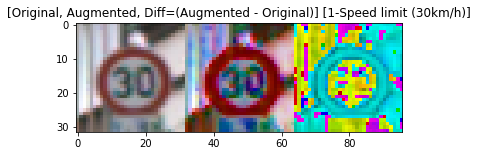

In [173]:

index = random.randint(0, len(clr_X_aug_train)-1)

print("Index:", index, ", Distortion:", train_distortions[index])
plot_image([clr_sampled_X_train[index], clr_X_aug_train[index], 
            clr_X_aug_train[index] - clr_sampled_X_train[index]], 
           "[Original, Augmented, Diff=(Augmented - Original)] " +
           get_name(clr_sampled_y_train[index]))


### [Cell 6] Include an exploratory visualization of the dataset

Visualize the German Traffic Signs Dataset using the pickled file(s). This is open ended, suggestions include: plotting traffic sign images, plotting the count of each sign, etc.

The [Matplotlib](http://matplotlib.org/) [examples](http://matplotlib.org/examples/index.html) and [gallery](http://matplotlib.org/gallery.html) pages are a great resource for doing visualizations in Python.

**NOTE:** It's recommended you start with something simple first. If you wish to do more, come back to it after you've completed the rest of the sections.

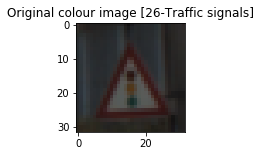

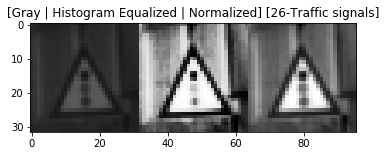

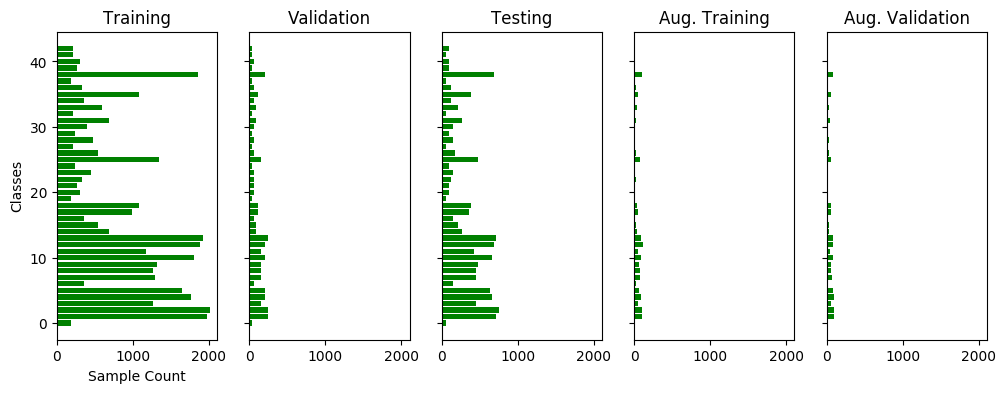

Training [ 180 1980 2010 1260 1770 1650  360 1290 1260 1320 1800 1170 1890 1920  690
  540  360  990 1080  180  300  270  330  450  240 1350  540  210  480  240
  390  690  210  599  360 1080  330  180 1860  270  300  210  210]
Validation [ 30 240 240 150 210 210  60 150 150 150 210 150 210 240  90  90  60 120
 120  30  60  60  60  60  30 150  60  30  60  30  60  90  30  90  60 120
  60  30 210  30  60  30  30]
Testing [ 60 720 750 450 660 630 150 450 450 480 660 420 690 720 270 210 150 360
 390  60  90  90 120 150  90 480 180  60 150  90 150 270  60 210 120 390
 120  60 690  90  90  60  90]
Aug. Training [ 11 102 101  56  85  70  24  75  77  70  93  57 111  93  38  26  13  55
  43  17   9  17  31  16  13  79  28  11  17  14  16  31   9  36  16  47
  22   3 107  16  14  12  13]
Aug. Validation [ 15  97 102  62 101  83  13  76  61  55  89  49  88  85  32  27  22  55
  53   8  17   8  15  20   9  58  32   8  26   9  16  39  10  35  18  60
  18  11  85   9  11   8   8]


In [178]:
import random
import cv2
from skimage.restoration import denoise_tv_chambolle

### Data exploration visualization code goes here.
### Feel free to use as many code cells as needed.
import matplotlib.pyplot as plt
# Visualizations will be shown in the notebook.
%matplotlib inline

def show_dist(results, n_classes, titles):
    fig, ax = plt.subplots(1, len(results), figsize=(12, 4), sharex = True, sharey = True)
    for i in range(len(results)):
        ax[i].barh(range(0, n_classes), np.bincount(results[i]), color='green')
        ax[i].set_title(titles[i])
        if i == 0:
            ax[i].set_ylabel("Classes")
            ax[i].set_xlabel("Sample Count")
    fig.subplots_adjust(hspace=3)
    plt.show()

    for result, title in zip(results, titles):
        count = np.bincount(result)
        print(title, count)
        for i, val in enumerate(count):
            if(val == 0):
                print("No data found for class:", i, y_names[i], "in", title, "set")


index = random.randint(0, len(clr_X_train)-1)
image = clr_X_train[index]

# Image visualization
gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
hist_image = cv2.equalizeHist(gray_image)
norm_image = cv2.normalize(gray_image, np.zeros(gray_image.shape), 0, 255, cv2.NORM_MINMAX, dtype=cv2.CV_8U)

# tf.reset_default_graph()
# tf_pre = tf.placeholder(tf.float32, (32, 32, 1))
# with tf.Session() as sess:
#     sess.run(tf.global_variables_initializer())
#     pre_img = sess.run(tf.image.per_image_standardization(tf_pre), feed_dict = {tf_pre: np.stack([gray_image], axis = -1)})
#     pre_img = pre_img.squeeze()

# plot_image([pre_img, gray_image - pre_img], "Test")
plot_image([image], "Original colour image " + get_name(clr_y_train[index]))
plot_image([gray_image, hist_image, norm_image], "[Gray | Histogram Equalized | Normalized] " + get_name(clr_y_train[index]))

# Dataset visualization
plt.rcdefaults()
show_dist([clr_y_train, clr_y_validation, clr_y_test, clr_y_aug_train, clr_y_aug_validation], n_classes, ["Training", "Validation", "Testing", "Aug. Training", "Aug. Validation"])


----

## Step 2: Design and Test a Model Architecture

Design and implement a deep learning model that learns to recognize traffic signs. Train and test your model on the [German Traffic Sign Dataset](http://benchmark.ini.rub.de/?section=gtsrb&subsection=dataset).

There are various aspects to consider when thinking about this problem:

- Neural network architecture
- Play around preprocessing techniques (normalization, rgb to grayscale, etc)
- Number of examples per label (some have more than others).
- Generate fake data.

Here is an example of a [published baseline model on this problem](http://yann.lecun.com/exdb/publis/pdf/sermanet-ijcnn-11.pdf). It's not required to be familiar with the approach used in the paper but, it's good practice to try to read papers like these.

**NOTE:** The LeNet-5 implementation shown in the [classroom](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/601ae704-1035-4287-8b11-e2c2716217ad/concepts/d4aca031-508f-4e0b-b493-e7b706120f81) at the end of the CNN lesson is a solid starting point. You'll have to change the number of classes and possibly the preprocessing, but aside from that it's plug and play!

### [Cell 7] Pre-process the Data Set (normalization, grayscale, etc.)

Use the code cell (or multiple code cells, if necessary) to implement the first step of your project.

In [202]:
### Preprocess the data here. Preprocessing steps could include normalization, converting to grayscale, etc.
### Feel free to use as many code cells as needed.

import cv2

def preprocess(img):
    
    # Convert to grayscale
    gray_image = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    
    # We normalize in order to deal with overly bright or overly dark pictures
    norm_image = cv2.normalize(gray_image, np.zeros(gray_image.shape), 0, 255, cv2.NORM_MINMAX, dtype=cv2.CV_8U)
    
    return np.stack([norm_image], axis = -1)

def preprocess_list(images):
    processed_images = [preprocess(img) for img in images]
    return np.array(processed_images).reshape((images.shape[0],) + processed_images[0].shape)

print("Preprocessing images")
with StopWatch() as sw:
    
    print("Merging original and augmented training sets...")
    final_clr_X_train = np.append(clr_X_train, clr_X_aug_train, axis=0)
    final_clr_y_train = np.append(clr_y_train, clr_y_aug_train)
    
    print("Merging original and augmented validation sets...")
    final_clr_X_validation = np.append(clr_X_validation, clr_X_aug_validation, axis=0)
    final_clr_y_validation = np.append(clr_y_validation, clr_y_aug_validation)

#     final_clr_X_train = clr_X_train
#     final_clr_y_train = clr_y_train
    
#     final_clr_X_validation = clr_X_validation
#     final_clr_y_validation = clr_y_validation
    
    print("Shape before preprocessing: ", final_clr_X_train.shape)
    pre_X_train = preprocess_list(final_clr_X_train)
    pre_y_train = np.copy(final_clr_y_train)
    print("Shape after preprocessing: ", final_clr_X_train.shape)
    
    pre_X_test = preprocess_list(clr_X_test)
    pre_y_test = np.copy(clr_y_test)
    
    pre_X_validation = preprocess_list(final_clr_X_validation)
    pre_y_validation = np.copy(final_clr_y_validation)
    
image_shape = pre_X_train[0].shape
print("Image shape (after preprocessing): ", image_shape)    

print("Number of training examples =", pre_X_train.shape[0])
print("Number of validation examples =", pre_X_validation.shape[0])


Preprocessing images
Merging original and augmented training sets...
Merging original and augmented validation sets...
Shape before preprocessing:  (36593, 32, 32, 3)
Shape after preprocessing:  (36593, 32, 32, 3)
Total time taken: 2.15 seconds
Image shape (after preprocessing):  (32, 32, 1)
Number of training examples = 36593
Number of validation examples = 6113


## [Cell 8] Visualize after preprocessing

Image index:  21082


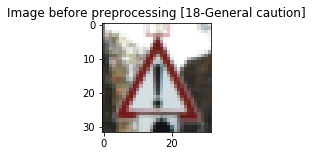

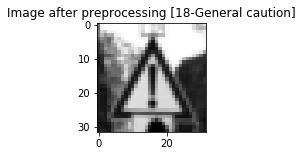

18


In [203]:
import random
import cv2
import matplotlib.pyplot as plt
%matplotlib inline


index = random.randint(0, len(pre_X_train)-1)
print("Image index: ", index)

plot_image([clr_X_train[index]], "Image before preprocessing " + get_name(clr_y_train[index]))
plot_image([pre_X_train[index]], "Image after preprocessing " + get_name(pre_y_train[index]))

print(pre_y_train[index])


## [Cell 9] Pipeline

The below section defines a pipeline for wiring up different layers. The pipeline has support for convolutions, pooling, flattening and fully connected layers.

To add a new method to the pipeline, add a backing method with the actual parameters and (input, input_dimensions) as the last two parameters. Now, define a proxy method which returns a partial taking in the actual parameters. The pipeline wiring code will take care of passing (input, input_dimensions) across different layers. Each method in the pipeline is supposed to return (output, output_dimensions).

In [204]:
import tensorflow as tf
from tensorflow.contrib.layers import flatten
from functools import partial

# Arguments used for tf.truncated_normal, randomly defines variables for the weights and biases for each layer
mu = 0
sigma = 0.1

"""
Returns the dimension after performing a kernel and stride operation.
"""
def dim_after_processing(input_dim, kernel_dim, stride_dim, output_depth):
    if stride_dim == 1: 
        output_dim = int(input_dim[0] - kernel_dim + 1)
    else:
        output_dim = int(input_dim[0] / stride_dim)
    return (output_dim, output_dim, output_depth)

"""
Performs a convolution with kernel size "kernel_dim x kernel_dim", stride "stride_dim x stride_dim" resulting in
an output depth of "output_depth". A RELU is used for activation.

The padding is hardcoded as "VALID", and the length and height, rather, the first 2 dimensions
are assumed to be equal to each other.
"""
def conv(kernel_dim, output_depth, stride_dim, layer_id, conv_input, input_dim):
    with tf.name_scope('conv_weights' + layer_id):
        conv_weight = tf.Variable(tf.truncated_normal([kernel_dim, kernel_dim, input_dim[2], output_depth], mean=mu, stddev=sigma))
        
    with tf.name_scope('conv_biases' + layer_id):
        conv_bias = tf.Variable(tf.zeros(output_depth))
    
    conv_layer = tf.nn.conv2d(conv_input, conv_weight, strides = [1, stride_dim, stride_dim, 1], padding='VALID')
    conv_layer = tf.nn.bias_add(conv_layer, conv_bias)
    
    conv_layer = tf.nn.relu(conv_layer)
    
    output_dim = dim_after_processing(input_dim, kernel_dim, stride_dim, output_depth)
    
    tf.contrib.framework.add_model_variable(conv_weight)
    tf.contrib.framework.add_model_variable(conv_bias)
    
    return conv_layer, output_dim

"""
Pipeline proxy method for convolutions
"""
def convp(kernel_dim, output_depth, stride_dim, layer_id = ""):
    return partial(conv, kernel_dim, output_depth, stride_dim, layer_id)

def fc(fc_output_dim, apply_relu, fc_input, input_dim):
    with tf.name_scope('fc_weights'):
        fc_weight = tf.Variable(tf.truncated_normal([input_dim, fc_output_dim], mean=mu, stddev=sigma))
        
    with tf.name_scope('fc_biases'):        
        fc_bias = tf.Variable(tf.zeros(fc_output_dim))
        
    with tf.name_scope("fc_pre_activations"):
        fc_layer = tf.matmul(fc_input, fc_weight) + fc_bias
        
    if apply_relu:
        fc_layer = tf.nn.relu(fc_layer)
        
    tf.contrib.framework.add_model_variable(fc_weight)
    tf.contrib.framework.add_model_variable(fc_bias)
    return fc_layer, fc_output_dim

def fcp(output_dim, apply_relu=True):
    return partial(fc, output_dim, apply_relu)

def max_pool(kernel_dim, stride_dim, pool_input, input_dim):
    pool_op = tf.nn.max_pool(pool_input, ksize = [1, kernel_dim, kernel_dim, 1], strides=[1, stride_dim, stride_dim, 1], padding='VALID')
    return pool_op, dim_after_processing(input_dim, kernel_dim, stride_dim, input_dim[2])

def max_poolp(kernel_dim, stride_dim):
    return partial(max_pool, kernel_dim, stride_dim)

def avg_pool(kernel_dim, stride_dim, pool_input, input_dim):
    pool_op = tf.nn.avg_pool(pool_input, ksize = [1, kernel_dim, kernel_dim, 1], strides=[1, stride_dim, stride_dim, 1], padding='VALID')
    return pool_op, dim_after_processing(input_dim, kernel_dim, stride_dim, input_dim[2])

def avg_poolp(kernel_dim, stride_dim):
    return partial(avg_pool, kernel_dim, stride_dim)

def local_flatten(flatten_input, input_dim):
    return flatten(flatten_input), input_dim[0]*input_dim[1]*input_dim[2]

def local_flattenp():
    return partial(local_flatten)

def dropout(dropout_input, input_dim):
    with tf.name_scope('dropout'):
        return tf.nn.dropout(dropout_input, keep_prob), input_dim

def dropoutp():
    return partial(dropout)

def run_pipeline(pipeline_input, input_dim, layers):
    prev_input, prev_dim = pipeline_input, input_dim
    for layer in layers:
        prev_input, prev_dim = layer(prev_input, prev_dim)
        
    return prev_input



### [Cell 10] Model Architecture

In [228]:
"""
The actual CNN architecture
"""
def DNet(x):
    return run_pipeline(x, image_shape, #Input: 32x32xD
    [
        convp(3, 6, 1, "1"), # 30x30x6
        convp(3, 12, 1, "2"), # 28x28x12
        avg_poolp(2, 2), # 14x14x12
        convp(5, 32, 1, "3"), # 10x10x32
        avg_poolp(2, 2), # 5x5x32
        local_flattenp(), # 800
        fcp(240),
        fcp(168),
        dropoutp(),
        fcp(n_classes, False) # 43
    ])


# The below methods contain other architectures I had tried out while experimenting. Please ignore.

def DNet_old15(x): # rate: 0018, keep_prob: 0.5, acc: 96.2
    return run_pipeline(x, image_shape, #Input: 32x32xD
    [
        convp(3, 3, 1, "1"), # 30x30x3
        convp(5, 6, 1, "2"), # 26x26x6
        max_poolp(2, 2), # 13x13x6
        convp(6, 18, 1, "3"), # 8x8x18
        max_poolp(2, 2), # 4x4x18
        local_flattenp(), # 900
        fcp(164),
        fcp(101),
        dropoutp(),
        fcp(n_classes, False) # 43
    ])

def DNet_old14(x): # rate: 0021, keep_prob: 0.5, acc: 96.3 (as high as 97.5)
    return run_pipeline(x, image_shape, #Input: 32x32xD
    [
        convp(3, 6, 1, "1"), # 30x30x6
        convp(5, 9, 1, "2"), # 26x26x9
        avg_poolp(2, 2), # 13x13x9
        convp(6, 18, 1, "3"), # 8x8x18
        avg_poolp(2, 2), # 4x4x18
        local_flattenp(), # 900
        fcp(164),
        fcp(101),
        dropoutp(),
        fcp(n_classes, False) # 43
    ])


def DNet_old13(x): # rate: 0021, keep_prob: 0.5, acc: 96.3 (as high as 97.5)
    return run_pipeline(x, image_shape, #Input: 32x32xD
    [
        convp(3, 6, 1, "1"), # 30x30x4
        convp(3, 12, 1, "2"), # 28x28x8
        avg_poolp(2, 2), # 14x14x8
        convp(5, 32, 1, "3"), # 10x10x24
        avg_poolp(2, 2), # 5x5x24
        local_flattenp(), # 800
        fcp(220),
        fcp(154),
        dropoutp(),
        fcp(n_classes, False) # 43
    ])

def DNet_old12(x): # rate: 0.001, keep_prob: 0.7, acc: 96.5
    return run_pipeline(x, image_shape, #Input: 32x32xD
    [
        convp(3, 4, 1, "1"), # 30x30x4
        convp(3, 8, 1, "2"), # 28x28x8
        avg_poolp(2, 2), # 14x14x8
        convp(5, 24, 1, "3"), # 10x10x24
        avg_poolp(2, 2), # 5x5x24
        local_flattenp(), # 800
        fcp(220),
        fcp(154),
        dropoutp(),
        fcp(n_classes, False) # 43
    ])

def DNet_old11(x): # rate = 0.001, keep_prob = 0.7, acc as high as 97.4
    return run_pipeline(x, image_shape, #Input: 32x32xD
    [
        convp(3, 4, 1, "1"), # 30x30x4
        convp(3, 8, 1, "2"), # 28x28x8
        avg_poolp(2, 2), # 14x14x8
        convp(5, 16, 1, "3"), # 10x10x16
        avg_poolp(2, 2), # 5x5x16
        local_flattenp(), # 400
        fcp(200),
        fcp(84),
        dropoutp(),
        fcp(n_classes, False) # 43
    ])

def LeNet(x):
    return run_pipeline(x, image_shape, #Input: 32x32x1
    [
        convp(5, 6, 1), # 28x28x6
        max_poolp(2, 2), # 14x14x6
        convp(5, 16, 1), # 10x10x16
        max_poolp(2, 2), # 5x5x16
        local_flattenp(), # 400
        fcp(120), # 120
        fcp(84), # 84
        fcp(n_classes, False) # 43
    ])

### Train, Validate and Test the Model

A validation set can be used to assess how well the model is performing. A low accuracy on the training and validation
sets imply underfitting. A high accuracy on the test set but low accuracy on the validation set implies overfitting.

## [Cell 11] Model Evaluation

In [229]:
import sklearn as sk
from collections import defaultdict

model_file = "./lenet-new-next-after-97.2-2"

def evaluate(X_data, y_data, batch_size):
    num_examples = len(X_data)
    total_accuracy = 0
    total_predicted = np.zeros(n_classes)
    total_actual = np.zeros(n_classes)
    
    tp = np.zeros(n_classes)
    fp = np.zeros(n_classes)
    fn = np.zeros(n_classes)
    
    sess = tf.get_default_session()
    for offset in range(0, num_examples, batch_size):
        batch_x, batch_y = X_data[offset:offset+batch_size], y_data[offset:offset+batch_size]
        batch_accuracy, batch_predicted, batch_actual = sess.run([accuracy_operation, predicted_values, actual_values], feed_dict={x: batch_x, y: batch_y, keep_prob: 1.0})
        batch_predicted_count = np.bincount(batch_predicted, minlength=n_classes)
        batch_actual_count = np.bincount(batch_actual, minlength=n_classes)
        total_accuracy += (batch_accuracy * len(batch_x))
        total_predicted += batch_predicted_count
        total_actual += batch_actual_count
        
        for p, a in zip(batch_predicted, batch_actual):
            if p == a:
                tp[p] += 1
            else:
                fp[p] += 1
                fn[a] += 1
        
    # 1 - Perfect match
    # < 1 - Underfitting
    # > 1 - Overfitting
    match_percentage = np.round(np.abs(total_predicted/total_actual), decimals=3)
    
    # https://en.wikipedia.org/wiki/Precision_and_recall#Definition_.28classification_context.29
    precision = np.round(tp/(tp+fp), decimals=3)
    recall = np.round(tp/(tp+fn), decimals=3)
    print("Match percentage: ", match_percentage)
    print("Precision: ", precision)
    print("Recall: ", recall)
    
    return (total_accuracy/num_examples), match_percentage, precision, recall


def summarize_results(match_percentage, precision, recall):
    op_format = "{:4}{:50}{:>7}{:>7}{:>7}"
    print(op_format.format("No", "Sign", "Match%", "Prc", "Rcl"))
    for i, (m, p, r) in enumerate(zip(match_percentage, precision, recall)):
        print(op_format.format(str(i), y_names[i], m, p, r))


# [Cell 12] Training the Model

In [254]:
from sklearn.utils import shuffle

EPOCHS = 30
BATCH_SIZE = 128

rate = 0.00095 # Original 0.001

X_train = np.copy(pre_X_train)
X_validation = np.copy(pre_X_validation)
X_test = np.copy(pre_X_test)

y_train = np.copy(pre_y_train)
y_validation = np.copy(pre_y_validation)
y_test = np.copy(pre_y_test)

tf.reset_default_graph()

x = tf.placeholder(tf.float32, (None,) + image_shape)
y = tf.placeholder(tf.int32, (None))
keep_prob = tf.placeholder(tf.float32)
one_hot_y = tf.one_hot(y, n_classes)

logits = DNet(x)

with tf.name_scope("cross_entropy"):
    cross_entropy = tf.nn.softmax_cross_entropy_with_logits(logits, one_hot_y)
    # Code taken from :)
    # http://stackoverflow.com/questions/38286717/tensorflow-regularization-with-l2-loss-how-to-apply-to-all-weights-not-just
    # All the variables have a proper name scope. So the code to exclude biases below is fine.
    lossL2 = tf.add_n([tf.nn.l2_loss(v) for v in tf.trainable_variables() 
                    if 'bias' not in v.name ]) * rate
    loss_operation = tf.reduce_mean(cross_entropy + lossL2)
    
with tf.name_scope("train"):
    optimizer = tf.train.AdamOptimizer(learning_rate = rate)
    training_operation = optimizer.minimize(loss_operation)

with tf.name_scope("accuracy"):
    with tf.name_scope("correct_prediction"):
        predicted_values = tf.argmax(logits, 1)
        actual_values = tf.argmax(one_hot_y, 1)
        correct_prediction = tf.equal(predicted_values, actual_values)
    with tf.name_scope("accuracy"):
        accuracy_operation = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))

with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    num_examples = len(X_train)
    
    print("Training...")
    print()
    for i in range(EPOCHS):
        print("Starting EPOCH: ", i)
        with StopWatch() as s:
            print("Training...")
            X_train, y_train = shuffle(X_train, y_train)
            for offset in range(0, num_examples, BATCH_SIZE):
                end = offset + BATCH_SIZE
                batch_x, batch_y = X_train[offset:end], y_train[offset:end]
                sess.run(training_operation, {x: batch_x, y: batch_y, keep_prob: 0.5})
        
        with StopWatch() as s:
            print("Validating...")
            validation_accuracy, match_percentage, precision, recall = evaluate(X_validation, y_validation, BATCH_SIZE)
            print("Validation Accuracy = {:.3f}".format(validation_accuracy))
        print()
        
    print("Saving the model...")
    saver = tf.train.Saver()
    saver.save(sess, model_file)
    print("Model saved")
    
summarize_results(match_percentage, precision, recall)


Training...

Starting EPOCH:  0
Training...
Total time taken: 6.20 seconds
Validating...
Match percentage:  [ 0.156  1.315  0.971  0.854  1.058  1.01   0.918  0.845  0.872  1.015
  0.906  1.101  1.376  1.062  0.918  0.966  0.573  1.04   1.855  0.895
  0.494  0.588  0.8    1.362  0.333  0.981  0.663  0.079  1.116  0.974
  0.75   1.008  1.025  0.912  0.731  1.067  1.     1.024  1.01   1.436
  0.507  0.737  0.789]
Precision:  [ 0.857  0.711  0.855  0.923  0.857  0.774  0.97   0.895  0.848  0.933
  0.974  0.831  0.712  0.893  0.964  0.965  0.957  0.918  0.502  0.971
  0.632  0.975  0.9    0.596  0.385  0.858  0.721  0.667  0.802  0.605
  0.842  0.9    0.78   0.886  0.982  0.833  0.923  0.881  0.883  0.661
  0.389  0.929  0.933]
Recall:  [ 0.133  0.935  0.83   0.788  0.907  0.782  0.89   0.757  0.739  0.946
  0.883  0.915  0.98   0.948  0.885  0.932  0.549  0.954  0.931  0.868
  0.312  0.574  0.72   0.812  0.128  0.841  0.478  0.053  0.895  0.59
  0.632  0.907  0.8    0.808  0.718  0.889  0

## [Cell 13] Checking for Over and Underfitting

High accuracy on both the training and validation sets indicates that the model is just right. High accuracy on the training set, but low accuracy on the validation set indicates that the model is overfitted to the training set.

In [255]:
with StopWatch() as s:
    with tf.Session() as sess:
        saver.restore(sess, model_file)

        train_accuracy, match_percentage, precision, recall = evaluate(X_train, y_train, BATCH_SIZE)
        print("Training Set Accuracy = {:.3f}".format(train_accuracy))

        validation_accuracy, match_percentage, precision, recall = evaluate(X_validation, y_validation, BATCH_SIZE)
        print("Validation Set Accuracy = {:.3f}".format(validation_accuracy))

Match percentage:  [ 1.016  1.009  0.954  0.98   1.012  1.037  0.997  1.     1.005  1.007
  0.998  1.002  1.     0.999  1.     1.     1.     1.     0.999  1.005
  1.006  1.     1.003  1.002  1.     1.002  0.996  1.005  1.012  0.976
  1.005  0.993  1.     1.002  1.     1.001  1.     1.     0.999  0.997
  0.997  1.     1.   ]
Precision:  [ 0.985  0.989  1.     1.     0.986  0.962  1.     0.999  0.994  0.993
  0.997  0.998  1.     1.     1.     1.     0.997  1.     1.     0.995
  0.994  0.997  0.997  0.998  1.     0.998  1.     0.995  0.988  1.     0.995
  1.     1.     0.998  1.     0.999  1.     1.     0.999  0.996  1.     1.
  1.   ]
Recall:  [ 1.     0.998  0.954  0.98   0.998  0.998  0.997  0.999  0.999  1.     0.995
  1.     1.     0.999  1.     1.     0.997  1.     0.999  1.     1.     0.997
  1.     1.     1.     1.     0.996  1.     1.     0.976  1.     0.993  1.
  1.     1.     1.     1.     1.     0.998  0.993  0.997  1.     1.   ]
Training Set Accuracy = 0.995
Match percentage

## [Cell 14] Testing the Model

We will use the test images to test the model

In [256]:
with StopWatch() as s:
    with tf.Session() as sess:
        saver.restore(sess, model_file)

        test_accuracy, match_percentage, precision, recall = evaluate(X_test, y_test, BATCH_SIZE)
        print("Test Set Accuracy = {:.3f}".format(test_accuracy))
        
summarize_results(match_percentage, precision, recall)

Match percentage:  [ 0.95   1.065  0.955  0.956  1.044  1.041  0.913  0.929  1.107  1.09
  0.962  1.064  1.041  0.99   1.     1.048  1.     1.     0.913  1.2    1.233
  0.711  1.025  1.133  1.011  1.015  0.972  0.983  1.04   0.922  0.78
  0.967  0.883  1.005  1.042  1.013  0.992  0.917  0.936  0.944  0.878
  0.767  0.967]
Precision:  [ 1.     0.931  0.999  0.981  0.943  0.941  1.     0.988  0.898  0.91
  0.997  0.915  0.95   0.999  0.996  0.95   1.     0.997  0.98   0.819
  0.811  0.906  0.902  0.835  0.934  0.91   0.869  0.508  0.949  1.     0.889
  0.996  0.906  0.981  0.944  0.957  0.95   0.982  0.981  0.988  0.962
  0.913  0.989]
Recall:  [ 0.95   0.992  0.953  0.938  0.985  0.979  0.913  0.918  0.993  0.992
  0.959  0.974  0.988  0.989  0.996  0.995  1.     0.997  0.895  0.983  1.
  0.644  0.925  0.947  0.944  0.923  0.844  0.5    0.987  0.922  0.693
  0.963  0.8    0.986  0.983  0.969  0.942  0.9    0.919  0.933  0.844  0.7
  0.956]
Test Set Accuracy = 0.952
Total time taken: 1.6

---

## Step 3: Test a Model on New Images

To give yourself more insight into how your model is working, download at least five pictures of German traffic signs from the web and use your model to predict the traffic sign type.

You may find `signnames.csv` useful as it contains mappings from the class id (integer) to the actual sign name.

### [Cell 15] Load and Output the Images

['german-signs/2-50limit-1-resized.png', 'german-signs/14-Stop-1-resized.png', 'german-signs/27-Pedestrians-1-resized.png', 'german-signs/25-Road work-1-resized.png', 'german-signs/1-30limit-1-resized.png']
german-signs/2-50limit-1-resized.png :  (32, 32, 3)
german-signs/14-Stop-1-resized.png :  (32, 32, 3)
german-signs/27-Pedestrians-1-resized.png :  (32, 32, 3)
german-signs/25-Road work-1-resized.png :  (32, 32, 3)
german-signs/1-30limit-1-resized.png :  (32, 32, 3)


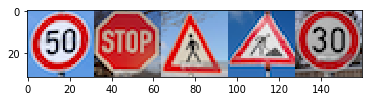

Y-values:  ['[2-Speed limit (50km/h)]', '[14-Stop]', '[27-Pedestrians]', '[25-Road work]', '[1-Speed limit (30km/h)]']


In [257]:
### Load the images and plot them here.
### Feel free to use as many code cells as needed.
import cv2
import os
from os import listdir
from os.path import isfile, join
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline

def load_image(im_path):
    # Taken from: http://stackoverflow.com/questions/28670461/read-an-image-with-opencv-and-display-it-with-tkinter
    img = cv2.imread(f)
    b,g,r = cv2.split(img)
    img = cv2.merge((r,g,b))
    return img

web_files_dir = "german-signs"
web_files = [join(web_files_dir, f) for f in listdir(web_files_dir) if isfile(join(web_files_dir, f)) and not f.startswith(".")]
print(web_files)
### Load the images and plot them here.
### Feel free to use as many code cells as needed.

X_web_raw = []
y_web_raw = []
for f in web_files:
    img = load_image(f)
    print(f, ": ", img.shape)
    X_web_raw.append(img)

    _, file_name = os.path.split(f)
    # Files are of the format [y_value]-[FileName].png
    y_web_raw.append(int(file_name.split("-")[0]))
    
    
plt.imshow(np.hstack(X_web_raw))
plt.show()

print("Y-values: ", [get_name(y_w) for y_w in y_web_raw])



### [Cell 16] Predict the Sign Type for Each Image

In [258]:
X_web = np.array(X_web_raw)
y_web = np.array(y_web_raw)

print("Web Shape: ", X_web.shape, " ", y_web.shape)
print("Train Shape: ", X_train.shape, " ", y_train.shape)

X_web = preprocess_list(X_web)
print("Web Shape after preprocessing: ", X_web.shape, " ", y_web.shape)


Web Shape:  (5, 32, 32, 3)   (5,)
Train Shape:  (36593, 32, 32, 1)   (36593,)
Web Shape after preprocessing:  (5, 32, 32, 1)   (5,)


In [259]:
### Run the predictions here and use the model to output the prediction for each image.
### Make sure to pre-process the images with the same pre-processing pipeline used earlier.
### Feel free to use as many code cells as needed.

with StopWatch() as s:
    with tf.Session() as sess:
        saver.restore(sess, model_file)
        sess = tf.get_default_session()
        predictions = sess.run(predicted_values, {x: X_web, y: y_web, keep_prob: 1.0})
        print("Predictions: ", [get_name(p) for p in predictions])
        print("Actual: ", [get_name(y_w) for y_w in y_web_raw])



Predictions:  ['[2-Speed limit (50km/h)]', '[14-Stop]', '[27-Pedestrians]', '[25-Road work]', '[1-Speed limit (30km/h)]']
Actual:  ['[2-Speed limit (50km/h)]', '[14-Stop]', '[27-Pedestrians]', '[25-Road work]', '[1-Speed limit (30km/h)]']
Total time taken: 0.83 seconds


### [Cell 17] Analyze Performance

In [260]:
### Calculate the accuracy for these 5 new images. 
### For example, if the model predicted 1 out of 5 signs correctly, it's 20% accurate on these new images.

with StopWatch() as s:
    with tf.Session() as sess:
        saver.restore(sess, model_file)
        sess = tf.get_default_session()
        accuracy = sess.run(accuracy_operation, {x: X_web, y: y_web, keep_prob: 1.0})
        print("Accuracy:", accuracy)


Accuracy: 1.0
Total time taken: 1.10 seconds


### [Cell 18] Output Top 5 Softmax Probabilities For Each Image Found on the Web

For each of the new images, print out the model's softmax probabilities to show the **certainty** of the model's predictions (limit the output to the top 5 probabilities for each image). [`tf.nn.top_k`](https://www.tensorflow.org/versions/r0.12/api_docs/python/nn.html#top_k) could prove helpful here. 

The example below demonstrates how tf.nn.top_k can be used to find the top k predictions for each image.

`tf.nn.top_k` will return the values and indices (class ids) of the top k predictions. So if k=3, for each sign, it'll return the 3 largest probabilities (out of a possible 43) and the correspoding class ids.

Take this numpy array as an example. The values in the array represent predictions. The array contains softmax probabilities for five candidate images with six possible classes. `tk.nn.top_k` is used to choose the three classes with the highest probability:

```
# (5, 6) array
a = np.array([[ 0.24879643,  0.07032244,  0.12641572,  0.34763842,  0.07893497,
         0.12789202],
       [ 0.28086119,  0.27569815,  0.08594638,  0.0178669 ,  0.18063401,
         0.15899337],
       [ 0.26076848,  0.23664738,  0.08020603,  0.07001922,  0.1134371 ,
         0.23892179],
       [ 0.11943333,  0.29198961,  0.02605103,  0.26234032,  0.1351348 ,
         0.16505091],
       [ 0.09561176,  0.34396535,  0.0643941 ,  0.16240774,  0.24206137,
         0.09155967]])
```

Running it through `sess.run(tf.nn.top_k(tf.constant(a), k=3))` produces:

```
TopKV2(values=array([[ 0.34763842,  0.24879643,  0.12789202],
       [ 0.28086119,  0.27569815,  0.18063401],
       [ 0.26076848,  0.23892179,  0.23664738],
       [ 0.29198961,  0.26234032,  0.16505091],
       [ 0.34396535,  0.24206137,  0.16240774]]), indices=array([[3, 0, 5],
       [0, 1, 4],
       [0, 5, 1],
       [1, 3, 5],
       [1, 4, 3]], dtype=int32))
```

Looking just at the first row we get `[ 0.34763842,  0.24879643,  0.12789202]`, you can confirm these are the 3 largest probabilities in `a`. You'll also notice `[3, 0, 5]` are the corresponding indices.

TopKV2(values=array([[  9.98441398e-01,   7.64498021e-04,   7.03125610e-04,
          8.46611583e-05,   6.14504688e-06],
       [  9.99993563e-01,   6.48391051e-06,   9.93248861e-09,
          1.11038434e-09,   1.10707910e-09],
       [  9.99999523e-01,   3.89904187e-07,   5.13784677e-08,
          4.79843578e-08,   4.05161593e-08],
       [  9.99894500e-01,   9.66163934e-05,   3.53943688e-06,
          3.33539765e-06,   7.89068565e-07],
       [  9.07057345e-01,   9.14273858e-02,   1.37805915e-03,
          9.28973968e-05,   3.70562448e-05]], dtype=float32), indices=array([[ 2,  4,  1,  5,  0],
       [14,  1,  4,  5,  7],
       [27, 18, 11, 26, 21],
       [25, 18, 11, 24,  1],
       [ 1,  4,  2,  5,  0]], dtype=int32))
Total time taken: 1.14 seconds


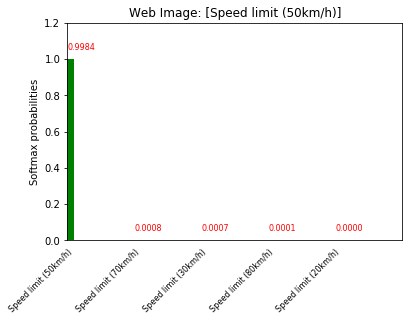

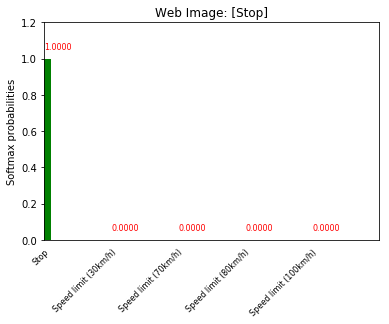

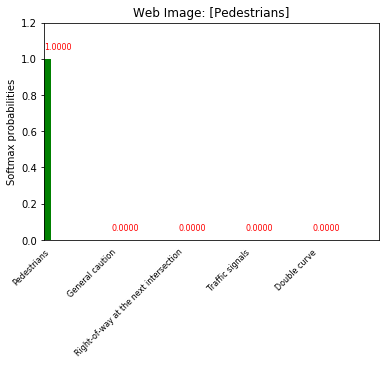

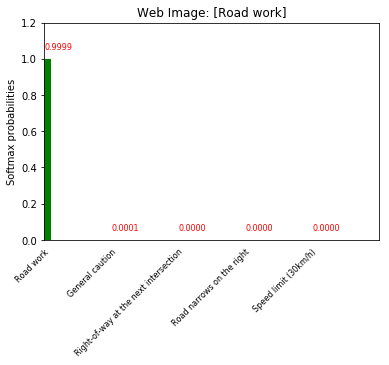

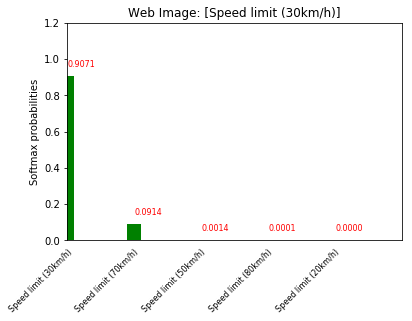

In [261]:
### Print out the top five softmax probabilities for the predictions on the German traffic sign images found on the web. 
### Feel free to use as many code cells as needed.

k_val = 5
with StopWatch() as s:
    with tf.Session() as sess:
        saver.restore(sess, model_file)
        sess = tf.get_default_session()
        top_k = sess.run(tf.nn.top_k(tf.nn.softmax(logits), k = k_val), {x: X_web, y: y_web, keep_prob: 1.0})
        print(top_k)

softmax_values = top_k.values
top_k_predictions = top_k.indices

for i, (softmax_value, top_k_prediction) in enumerate(zip(softmax_values, top_k_predictions)):
    fig, ax = plt.subplots()
    plt.axis([0, k_val, 0, 1.2])
    plt.title("Web Image: [" + y_names[y_web[i]] + "]")
    plt.tick_params(bottom='off')
    ax.set_ylabel('Softmax probabilities')
    ax.set_xticklabels([y_names[p] for p in top_k_prediction], fontsize=8, wrap=True, rotation=45, ha='right')
    bars = ax.bar(np.arange(X_web.shape[0]), softmax_value, 1.0/k_val, color='g')
    for bar in bars:
        height = bar.get_height()
        ax.text(bar.get_x() + bar.get_width()/2., height + bar.get_width()/5,"%.4f" % height, ha='left', va='bottom', fontsize=8, color='r')

plt.show()


> **Note**: Once you have completed all of the code implementations, you need to finalize your work by exporting the IPython Notebook as an HTML document. Before exporting the notebook to html, all of the code cells need to have been run. You can then export the notebook by using the menu above and navigating to  \n",
    "**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission. 

### Project Writeup

Once you have completed the code implementation, document your results in a project writeup using this [template](https://github.com/udacity/CarND-Traffic-Sign-Classifier-Project/blob/master/writeup_template.md) as a guide. The writeup can be in a markdown or pdf file. 